# Comparing TIC's with two-minute targets from Google Bucket

In [32]:
cd ..

/Users/azib/Documents/PhD/Exocomets


### Module Imports

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Functions

In [3]:
def plot_cumulative(data,data2,yscale='log'):

    plt.figure(figsize=(13,5))
    values,bins = np.histogram(data,bins=100)
    values2,bins2 = np.histogram(data2,bins=100)
    cumulative = np.cumsum(values) / len(data)
    cumulative2 = np.cumsum(values2) / len(data2)
    plt.plot(bins[:-1],cumulative,c='blue')
    plt.plot(bins2[:-1],cumulative2,c='red')
    xlabel = input('xlabel: ')
    ylabel = input('ylabel: ')
    title = input('title')
    plt.yscale(yscale)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    #plt.legend()
    plt.show()

In [23]:
bucket = pd.read_csv('tess/sector6lookup.csv')
bucket.head()

,Filename,RA,Dec,TIC_ID,Sector,Camera,CCD,Magnitude
0,tesslcs_sector_6_104/2_min_cadence_targets/tes...,95.791999,-1.608044,251269189,6,1,2,7.80838
1,tesslcs_sector_6_104/2_min_cadence_targets/tes...,84.545860,-0.936653,11199201,6,1,1,10.15940
2,tesslcs_sector_6_104/2_min_cadence_targets/tes...,84.402924,-0.887149,11197342,6,1,1,9.15940
3,tesslcs_sector_6_104/2_min_cadence_targets/tes...,102.088569,2.826208,234271852,6,1,2,13.56620
4,tesslcs_sector_6_104/2_min_cadence_targets/tes...,104.070502,3.549578,237736917,6,1,2,13.88590


In [5]:
bucket.Filename[0].split('/')

['tesslcs_sector_6_104', '2_min_cadence_targets', 'tesslc_251269189.pkl']

In [6]:
short_cd = bucket[bucket.Filename.str.contains('2_min_cadence_targets')]

---

### A cumulative plot of star magnitudes in 2-min targets

What fraction of stars in the TIC are 2-minute targets?

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
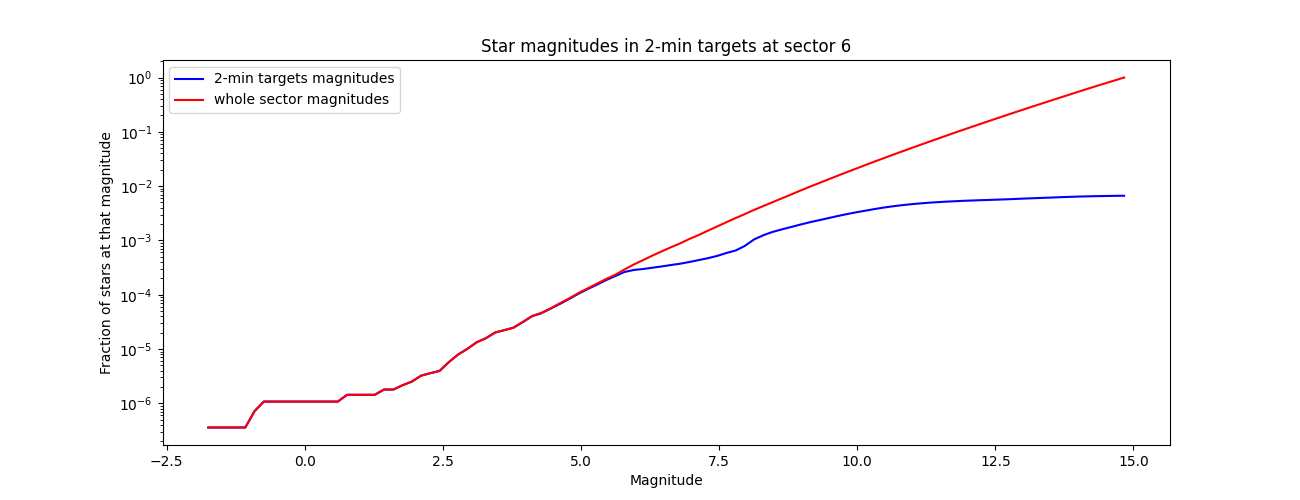

In [34]:
%matplotlib widget

plt.figure(figsize=(13,5))
values,bins = np.histogram(short_cd.Magnitude,bins=100)
values2,bins2 = np.histogram(bucket.Magnitude,bins=100)
cumulative = np.cumsum(values) / len(bucket.Magnitude)
cumulative2 = np.cumsum(values2) / len(bucket.Magnitude)
plt.plot(bins[:-1],cumulative,c='blue',label='2-min targets magnitudes')
plt.plot(bins2[:-1],cumulative2,c='red',label='whole sector magnitudes')
plt.yscale('log')
plt.xlabel('Magnitude')
plt.ylabel('Fraction of stars at that magnitude')
plt.title('Star magnitudes in 2-min targets at sector 6')
plt.legend()
#plt.xticks(np.arange(-3,15,1))
plt.show()

---

### What we think are saturated stars (~7 mag)

In [12]:
sat = bucket[bucket.Magnitude <= 7]

In [13]:
sat_short_cd = sat[sat.Filename.str.contains('2_min_cadence_targets')]

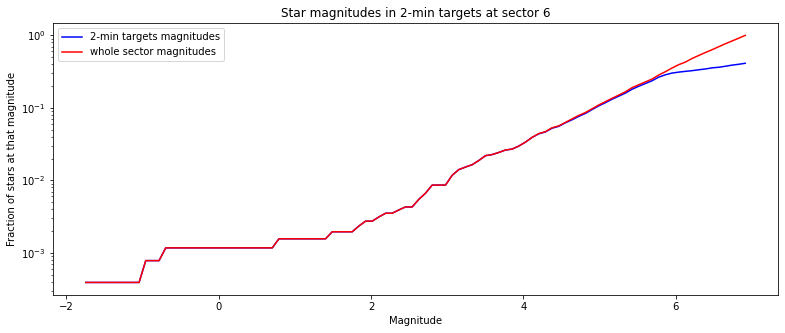

In [37]:
%matplotlib inline
plt.figure(figsize=(13,5))
values3,bins3 = np.histogram(sat_short_cd.Magnitude,bins=100)
values4,bins4 = np.histogram(sat.Magnitude,bins=100)
cumulative3 = np.cumsum(values3) / len(sat.Magnitude)
cumulative4 = np.cumsum(values4) / len(sat.Magnitude)
plt.plot(bins3[:-1],cumulative3,c='blue',label='2-min targets magnitudes')
plt.plot(bins4[:-1],cumulative4,c='red',label='whole sector magnitudes')
plt.yscale('log')
plt.xlabel('Magnitude')
plt.ylabel('Fraction of stars at that magnitude')
plt.title('Star magnitudes in 2-min targets at sector 6')
plt.legend()
plt.show()